In [133]:
import time
import timeit
import numpy as np
from scipy import interpolate

from mgcpy.independence_tests.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [134]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [135]:
def mgc(X, Y, is_fast=False):
    mgc = MGC()
#     mgc_statistic, independence_test_metadata = mgc.test_statistic(X, Y)
    p_value, metadata = mgc.p_value(X, Y, is_fast=is_fast)  # p-value call has mgc.test_statistic(X, Y) call
#     print("MGC stats from Python:")
#     print("MGC test statistic:", metadata["test_statistic"])
#     print("P Value:", p_value)
#     print("Optimal Scale:", metadata["optimal_scale"])
    return p_value, metadata

In [136]:
import matplotlib.pyplot as plt;
import seaborn as sns
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=2)

In [137]:
num_samples = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
linear_data_dcorr_times = [(50, [0.03530227699999955, 0.03007528400002002, 0.02789397200001531]), 
                           (100, [0.08847141200001829, 0.1006327779999765, 0.10103151199999161]), 
                           (200, [0.3445014119999996, 0.3373190419999901, 0.48196147500001985]), 
                           (500, [1.9459453159999782, 1.94906924, 1.876369025999992]), 
                           (1000, [7.270794276999993, 7.344032519999985, 7.5510465280000005]), 
                           (2000, [29.949594722, 29.144898159000007, 28.045119925999984]), 
                           (5000, [190.83023113499996, 192.24423500299997, 190.66331257899992]), 
                           (10000, [820.110880737, 808.4045245320001, 826.0645153840001])]
dcorr_times = [j for i, j in linear_data_dcorr_times]

r_energy_times = {10: [0.003587008, 0.004382133, 0.003922939], 
                  100: [0.01339483, 0.01248002, 0.01278901], 
                  200: [0.05293202, 0.05222321, 0.05154991], 
                  500: [0.322618, 0.3034542, 0.297482], 
                  1000: [1.539751, 1.548288, 1.608281], 
                  2000: [6.753545, 6.742709, 7.013516], 
                  5000: [57.56164, 55.64591, 55.66188], 
                  10000: [232.6233, 230.5168, 238.8018], }

r_kernlab_times = {10: [0.008503914, 0.008010149, 0.009541988], 
                   100: [0.01204896, 0.01178908, 0.01120996], 
                   200: [0.01812696, 0.01715708, 0.01779294], 
                   500: [0.0641818, 0.0681169, 0.06632996], 
                   1000: [0.257472, 0.656409, 0.2469659], 
                   2000: [0.937577, 0.9513628, 0.9621379], 
                   5000: [7.752684, 7.124511, 6.870045], 
                   10000: [30.85656, 30.64937, 30.5374], }

linear_data_copy = [(50, [20.277572832999795, 19.514672866999717, 19.76604124200003]),
                    (100, [77.21430823599985, 75.460420247, 76.92919380700005]),
                    (200, [360.83216021599947, 373.1858237340002, 399.7870919220004])]

python_perf_times = [j for i, j in linear_data_copy]
linear_data_fast_mgc = [(50, [0.002845835000002239, 0.0011753540000007945, 0.0010945900000010056]), 
                        (100, [0.002760518999998851, 0.002069775999999024, 0.0023434770000001492]), 
                        (200, [0.008292690000001102, 0.006414610999996739, 0.005347397000001308]), 
                        (500, [0.048456222000002214, 0.03643240600000297, 0.032817249000000714]), 
                        (1000, [0.20957781599999947, 0.16526774299999758, 0.15862956999999867]), 
                        (2000, [1.226450045, 1.0538206680000002, 1.0607039649999983]), 
                        (5000, [10.685185272999998, 10.098354584000006, 9.850486527999998]), 
                        (10000, [47.362619448000004, 42.27663848899999, 41.56813245399999])]
linear_data_fast_dcorr = [(50, [0.0051514219999972966, 0.0022076080000026366, 0.0018121000000022036]), 
                          (100, [0.0034445040000008476, 0.0030993330000015362, 0.0030953680000003203]), 
                          (200, [0.007373816999997729, 0.00601642899999888, 0.0060290710000003855]), 
                          (500, [0.01354306700000052, 0.013218483999999364, 0.013298075999998105]), 
                          (1000, [0.02722889400000028, 0.02713840299999859, 0.02569159599999793]), 
                          (2000, [0.05760880199999718, 0.05953626699999859, 0.05291860200000187]), 
                          (5000, [0.13682578100000242, 0.14193364200000147, 0.13060394499999717]), 
                          (10000, [0.28220065100000014, 0.2610882979999971, 0.257064794999998])]

python_perf_times_fast_mgc = [j for i, j in linear_data_fast_mgc]
python_perf_times_fast_dcorr = [j for i, j in linear_data_fast_dcorr]

mgcpy_data = [np.mean(i) for i in python_perf_times]
fastmgc_data = [np.mean(i) for i in python_perf_times_fast_mgc]
fastdcorr_data = [np.mean(i) for i in python_perf_times_fast_dcorr]
dcorr_data = [np.mean(i) for i in dcorr_times]
renergy_data = [np.mean(v) for k, v in r_energy_times.items()]
rkernlab_data = [np.mean(v) for k, v in r_kernlab_times.items()]

f_fastmgc = interpolate.interp1d(num_samples, fastmgc_data, kind='quadratic')
f_fastdcorr = interpolate.interp1d(num_samples, fastdcorr_data, kind='quadratic')
f_dcorr = interpolate.interp1d(num_samples, dcorr_data, kind='quadratic')
f_renergy = interpolate.interp1d(num_samples, renergy_data, kind='quadratic')
f_mgcpy_data = interpolate.interp1d(num_samples[0:3], mgcpy_data, kind='quadratic')
f_rkernlab_data = interpolate.interp1d(num_samples, rkernlab_data, kind='linear')

num_samp_new = np.arange(min(num_samples), max(num_samples), 10)

fastmgc_new = f_fastmgc(num_samp_new)
fastdcorr_new = f_fastdcorr(num_samp_new)
dcorr_new = f_dcorr(num_samp_new)
renergy_new = f_renergy(num_samp_new)
mgcpy_new = f_mgcpy_data(num_samp_new[0:3])
rkernlab_new = f_rkernlab_data(num_samp_new)

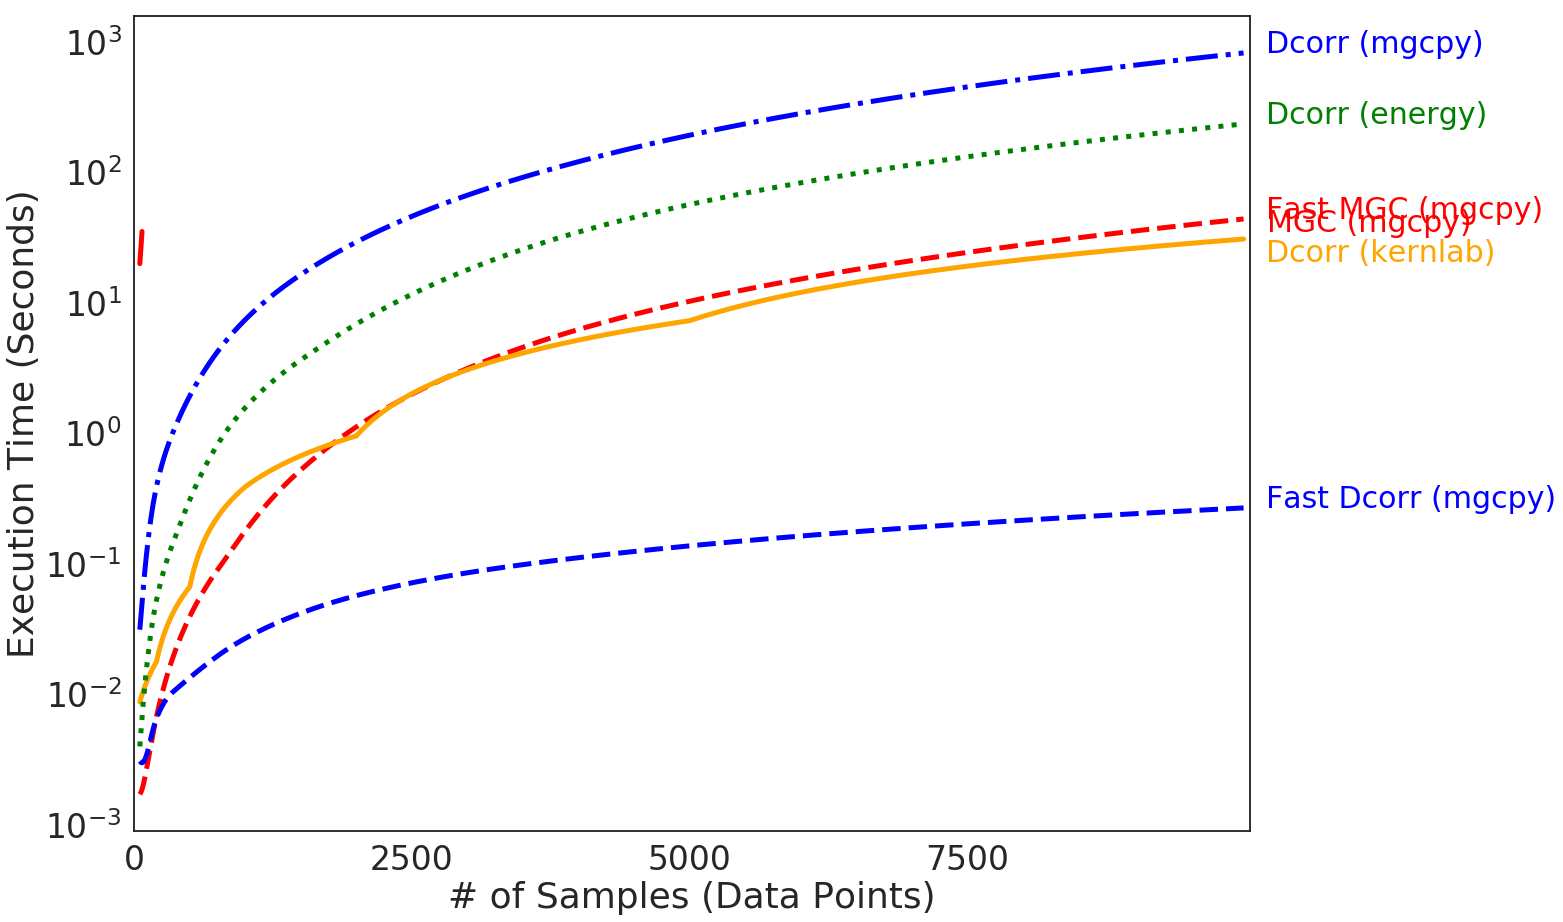

In [139]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.plot(num_samp_new[0:3], mgcpy_new, color='red', linestyle='-', linewidth=5, label="MGC (mgcpy)")
ax.plot(num_samp_new, dcorr_new, color='blue', linestyle='-.', linewidth=5, label="Dcorr (mgcpy)")
ax.plot(num_samp_new, fastmgc_new, color='red', linestyle='--', linewidth=5, label="Fast MGC (mgcpy)")
ax.plot(num_samp_new, rkernlab_new, color='orange', linestyle='-', linewidth=5, label="Dcorr (kernlab)")
ax.plot(num_samp_new, fastdcorr_new, color='blue', linestyle='--', linewidth=5, label="Fast Dcorr (mgcpy)")
ax.plot(num_samp_new, renergy_new, color='green', linestyle=':', linewidth=5, label="Dcorr (energy)")

plt.text(num_samp_new[-1]+200, mgcpy_new[-1], r'MGC (mgcpy)', color='red', fontsize=30)
plt.text(num_samp_new[-1]+200, dcorr_new[-1], r'Dcorr (mgcpy)', color='blue', fontsize=30)
plt.text(num_samp_new[-1]+200, fastmgc_new[-1], r'Fast MGC (mgcpy)', color='red', fontsize=30)
plt.text(num_samp_new[-1]+200, rkernlab_new[-1]-10, r'Dcorr (kernlab)', color='orange', fontsize=30)
plt.text(num_samp_new[-1]+200, fastdcorr_new[-1], r'Fast Dcorr (mgcpy)', color='blue', fontsize=30)
plt.text(num_samp_new[-1]+200, renergy_new[-1], r'Dcorr (energy)', color='green', fontsize=30)

plt.xlabel('# of Samples (Data Points)')
plt.ylabel('Execution Time (Seconds)')
_, labels = plt.yticks()
plt.xticks(np.arange(0, max(num_samples), max(num_samples)/4))
plt.yticks([1e-4, 1e-2, 1e0, 1e2, 1e4]);
plt.xlim(num_samples[0]-50, num_samples[-1]+50)
#leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.105), ncol=3)
#leg.get_frame().set_linewidth(0.0)
ax.set_yscale('log')
plt.savefig('perf_mgc.eps', bbox_inches='tight', transparent=True)
plt.show()

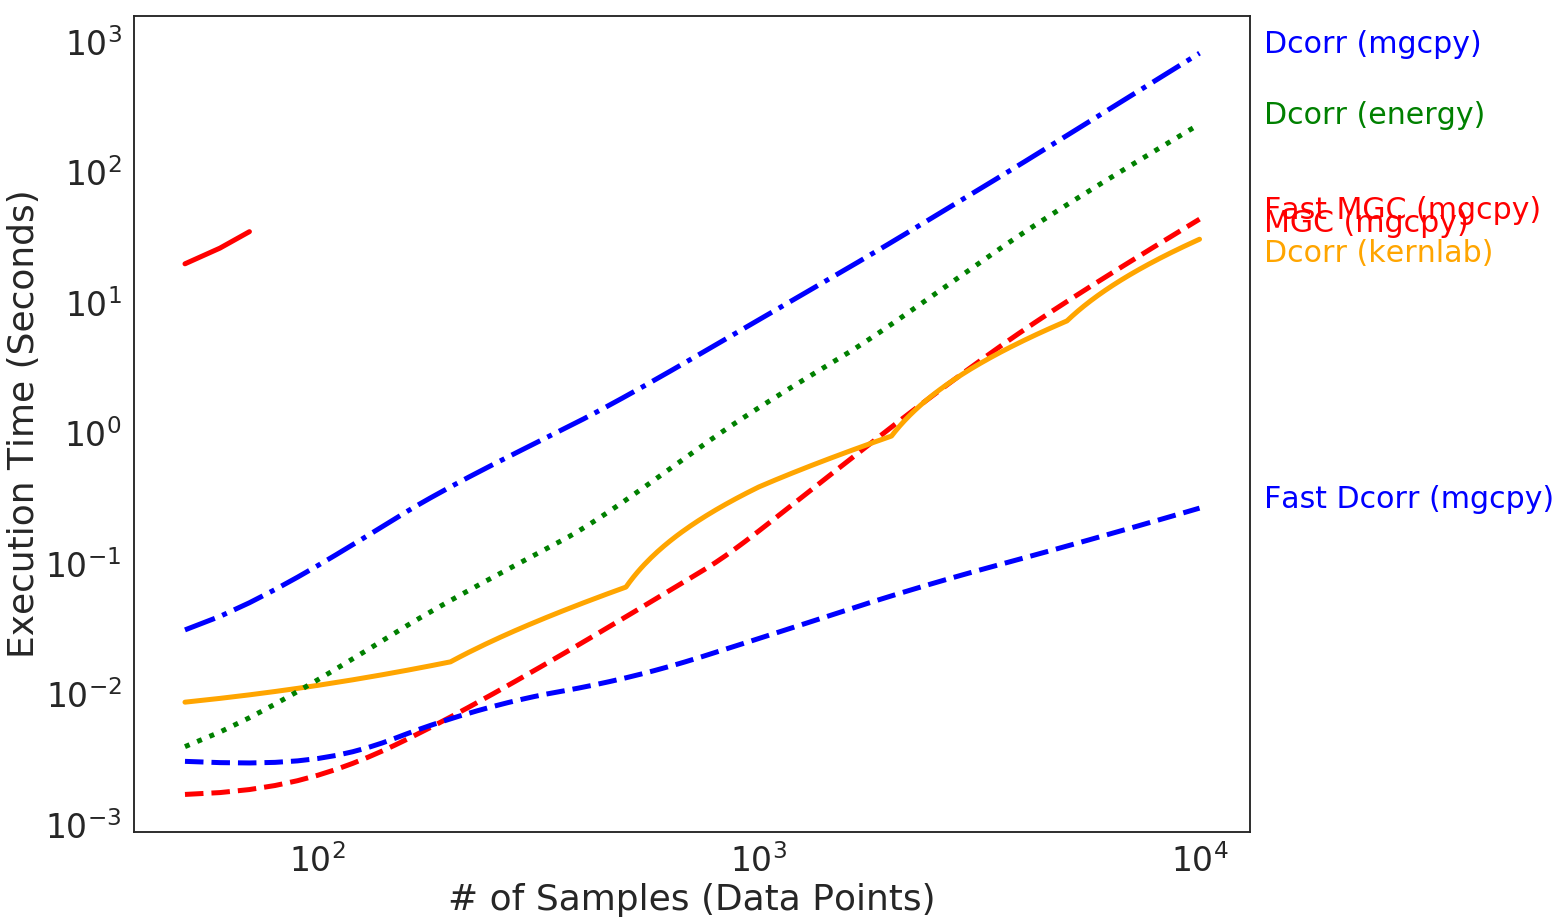

In [131]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.plot(num_samp_new[0:3], mgcpy_new, color='red', linestyle='-', linewidth=5, label="MGC (mgcpy)")
ax.plot(num_samp_new, dcorr_new, color='blue', linestyle='-.', linewidth=5, label="Dcorr (mgcpy)")
ax.plot(num_samp_new, fastmgc_new, color='red', linestyle='--', linewidth=5, label="Fast MGC (mgcpy)")
ax.plot(num_samp_new, rkernlab_new, color='orange', linestyle='-', linewidth=5, label="Dcorr (kernlab)")
ax.plot(num_samp_new, fastdcorr_new, color='blue', linestyle='--', linewidth=5, label="Fast Dcorr (mgcpy)")
ax.plot(num_samp_new, renergy_new, color='green', linestyle=':', linewidth=5, label="Dcorr (energy)")

plt.text(num_samp_new[-1]+4000, mgcpy_new[-1], r'MGC (mgcpy)', color='red', fontsize=30)
plt.text(num_samp_new[-1]+4000, dcorr_new[-1], r'Dcorr (mgcpy)', color='blue', fontsize=30)
plt.text(num_samp_new[-1]+4000, fastmgc_new[-1], r'Fast MGC (mgcpy)', color='red', fontsize=30)
plt.text(num_samp_new[-1]+4000, rkernlab_new[-1]-10, r'Dcorr (kernlab)', color='orange', fontsize=30)
plt.text(num_samp_new[-1]+4000, fastdcorr_new[-1], r'Fast Dcorr (mgcpy)', color='blue', fontsize=30)
plt.text(num_samp_new[-1]+4000, renergy_new[-1], r'Dcorr (energy)', color='green', fontsize=30)

plt.xlabel('# of Samples (Data Points)')
plt.ylabel('Execution Time (Seconds)')
_, labels = plt.yticks()
plt.xticks(np.arange(0, max(num_samples)+1, max(num_samples)/4))
plt.yticks([1e-4, 1e-2, 1e0, 1e2, 1e4]);
#plt.xlim(num_samples[0]-50, num_samples[-1]+50)
#leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.105), ncol=3)
#leg.get_frame().set_linewidth(0.0)
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig('perf_mgc.eps', bbox_inches='tight', transparent=True)
plt.show()